In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

#num_words는 이 데이터에서 등장 빈도 순위

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


In [2]:
#토큰화과 정수 인코딩(각 단어를 정수로 변환)을 마친 데이터 셋

print('첫번째 훈련용 뉴스 기사 :',X_train[0])
print('첫번째 훈련용 뉴스 기사의 레이블 :',y_train[0])

첫번째 훈련용 뉴스 기사 : [1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
첫번째 훈련용 뉴스 기사의 레이블 : 3


뉴스 기사의 최대 길이 :2376
뉴스 기사의 평균 길이 :145.5398574927633


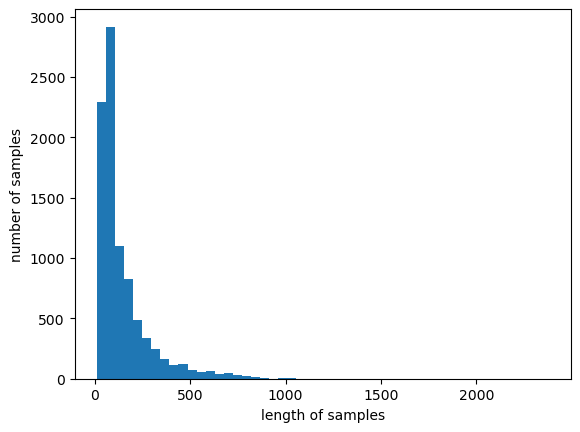

In [3]:
print('뉴스 기사의 최대 길이 :{}'.format(max(len(sample) for sample in X_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(sample) for sample in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

<Axes: ylabel='count'>

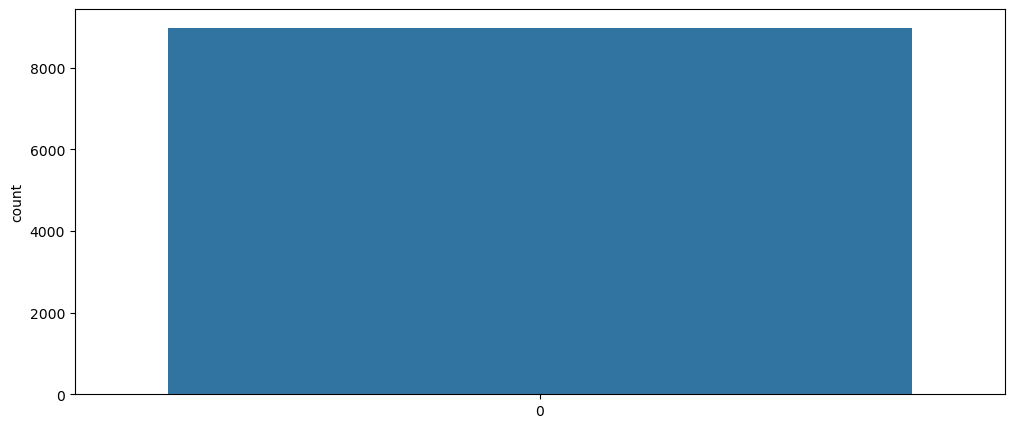

In [4]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [5]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [6]:
#reuters.get_word_index는 각 단어와 그 단어에 부여된 인덱스를 리턴

word_to_index = reuters.get_word_index()
#print(word_to_index)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

In [8]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[4]))

빈도수 상위 1번 단어 : the


In [9]:
print('빈도수 상위 128등 단어 : {}'.format(index_to_word[131]))

빈도수 상위 128등 단어 : tax


In [10]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 1000
max_len = 100

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
# Embedding 층은 텍스트 데이터를 숫자로 표현하는 데 사용
# 주어진 단어의 정수 인덱스를 해당 단어의 임베딩 벡터로 매핑
# vocab_size: 어휘 사전의 크기를 나타내며, 총 단어의 수
# embedding_dim: 임베딩 벡터의 차원 (hyperparemeter)
embedding_dim = 128
hidden_units = 128
num_classes = 46

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=5, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/5
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - acc: 0.3340 - loss: 2.9233
Epoch 1: val_acc improved from -inf to 0.45191, saving model to best_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - acc: 0.3351 - loss: 2.9125 - val_acc: 0.4519 - val_loss: 2.2701
Epoch 2/5
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - acc: 0.4809 - loss: 2.1035
Epoch 2: val_acc improved from 0.45191 to 0.47195, saving model to best_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - acc: 0.4814 - loss: 2.1019 - val_acc: 0.4720 - val_loss: 2.0739
Epoch 3/5
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - acc: 0.4897 - loss: 2.0232
Epoch 3: val_acc improved from 0.47195 to 0.52226, saving model to best_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - acc: 0.4900 - loss: 2.0227 - val_acc: 0.5223 - val_loss: 1.9400
Epoch 4/5
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - acc: 0.5297 - loss: 1.8789
Epoch 4: val_acc improved from 0.52226 to 0.57435, saving model to best_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 8

In [14]:
loaded_model = load_model('best_model.keras')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.5980 - loss: 1.6407

 테스트 정확도: 0.5886


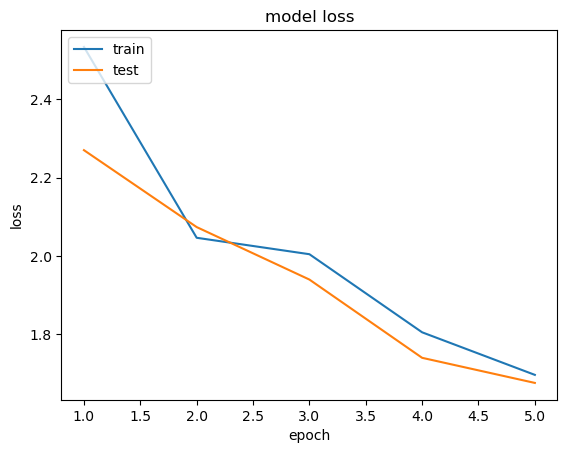

In [15]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()